In [1]:
import face_recognition
import cv2
import os
import numpy as np
import pickle
import matplotlib.pyplot as plt

known_dir = "C:/Users/Goku/Documents/jupyter_data/known_image"

In [2]:
#load face data from pickle

with open(os.path.join( known_dir, "faceData.pickle"), 'rb') as file:
    names, faces = pickle.load(file)

In [3]:
def enterName(photo, imageData):
    print("You are new to the system.")    
    naam = input("Enter your name here.<for cancellation type q >  Name: ")
    if naam == 'q':
        print("cancelled !!!")
    else:
        imgName = naam + ".jpg"
        cv2.imwrite( os.path.join(known_dir, imgName), photo)
        names.append(naam)
        faces.append(imageData)
        
        #delete old data.
        file = open(os.path.join( known_dir, "faceData.pickle"), 'w')
        file.close()
        
        #dump new data
        with open(os.path.join( known_dir, "faceData.pickle"), 'wb') as file:
            pickle.dump([names, faces], file)
        print("Your name is save as {}.".format(naam))

You are new to the system.
Enter your name here.<for cancellation type q >  Name: kamal
Your name is save as kamal.


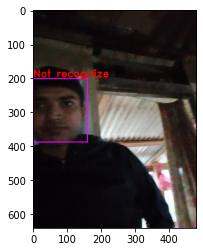

In [4]:
face_locations = []
face_encodings = []


cap = cv2.VideoCapture(1)

while 1:
    
    _,img = cap.read()
    
    # for front camera:
    img = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
    img = cv2.flip(img, 1)
    
    frame = img
    
    face_locations = face_recognition.face_locations(frame)
    
    face_encodings = face_recognition.face_encodings(frame, face_locations)
    
    face_names = []
    for face_encoding in face_encodings:

        matches = face_recognition.compare_faces(faces, face_encoding)
        name = "Not recognize"

        face_distances = face_recognition.face_distance(faces, face_encoding)
        best_match_index = np.argmin(face_distances)

        if matches[best_match_index]:
            name = "Hi " + names[best_match_index]

        face_names.append(name)
    i = 0   
    for y,w,h,x in face_locations:

        cv2.rectangle(frame, (x,y), (w,h), (255,0,255), 2)
        cv2.putText(frame, str(face_names[i]), (x, y-5), cv2.FONT_HERSHEY_DUPLEX, 1, (0,0,255), 2)

        i += 1
    
    
    new_frame = frame # cv2.resize(frame, (0, 0), fx=0.5, fy=0.5)
    cv2.imshow('image',new_frame)
    
    if i == 1:
        if face_names[i-1] == "Not recognize":
            plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
            _,new_img = cap.read()
            # for front camera:
            new_img = cv2.rotate(new_img, cv2.ROTATE_90_COUNTERCLOCKWISE)
            new_img = cv2.flip(new_img, 1)
            
            cap.release()
            cv2.destroyAllWindows()
            enterName(new_img, face_encodings[i-1])
            break
    
    if cv2.waitKey(1) == ord('q'):
            break
    
cap.release()
cv2.destroyAllWindows()